In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Function to make the plot prettier by messing around with the axis lines

def drop_spines(ax):
    
    # Move left and bottom spines outward by 10 points
    ax.spines.left.set_position(('outward', 10))
    ax.spines.bottom.set_position(('outward', 10))
    # Hide the right and top spines
    ax.spines.right.set_visible(False)
    ax.spines.top.set_visible(False)
    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    return ax

In [3]:
test = 'Arlington County'

# Plot VA boundaries and highlight selected county 
*(nice to have but throwing it as a holiday gift)*

In [4]:

boundaries = gpd.read_file('../src_data/boundaries/Virginia City_County Boundaries.geojson')

In [5]:
boundaries['namelsad']

0             Bedford County
1      Colonial Heights city
2          Buckingham County
3            Fluvanna County
4            Stafford County
               ...          
129             Suffolk city
130             Norfolk city
131           Pulaski County
132         Middlesex County
133        Rockbridge County
Name: namelsad, Length: 134, dtype: object

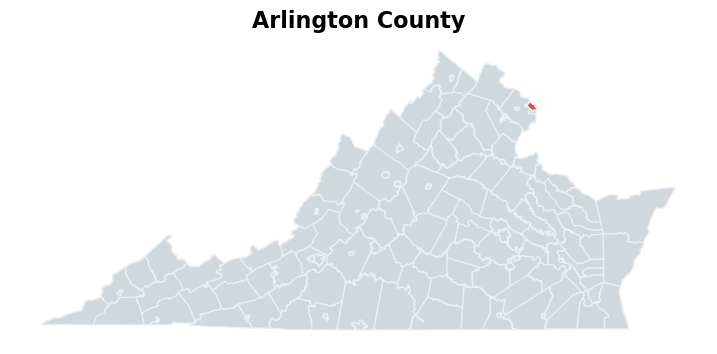

In [6]:
bdyfig, bdyax = plt.subplots(figsize=(10, 4))

bgcolor = '#CFD8DC'
fgcolor = '#F44336'
bgedge = '#ECEFF1'
fgedge = '#ECEFF1'

boundaries.plot(ax=bdyax,
                edgecolor=bgedge,
                color=bgcolor)

cty = boundaries[boundaries['namelsad'] == test]
cty.plot(ax=bdyax,
         edgecolor=fgedge,
         color=fgcolor)
bdyax.set_title(test, loc='center', fontsize=16, fontweight='bold')
bdyax.axis('off');

# Temperature-based indicators

In [7]:
tmax = pd.read_csv('../src_data/climdata/tmax_VA.csv', parse_dates=['date'])

# Clean up the column names
newcols = {col: col[4:] for col in tmax.columns[1:]}
tmax = tmax.rename(columns=newcols)

# Set date column as a datetime index

tmax = tmax.dropna()
tmax['date'] = pd.to_datetime(tmax['date'])
tmax = tmax.set_index('date')


# Set up plot and analysis constants and parameters

In [8]:
# Plot params
basecolor = '#90A4AE'
macolor = '#DA3B01'
markercolor = '#EF6950'

In [9]:
# Choose location then convert to degF
# Example subset

q = 0.5  # quantile value
base = ['1960', '1989']
roll = 10

df = tmax[test]*1.8+32  #convert to degF

In [10]:
# Compute the annual qth quantile tmax, then get anomaly and rolling mean
df_hot = df.resample('Y').quantile(q)

# Anomaly
anom = df_hot - df_hot.loc[base[0]:base[1]].mean()

# Rolling avg
df_hot_ma = anom.rolling(roll).mean()

(0.5, 2.5)

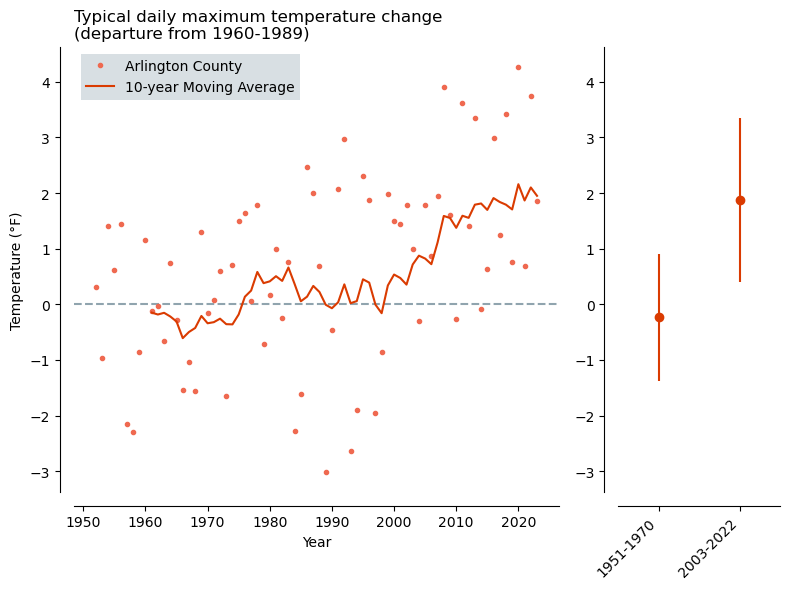

In [11]:
# Create 2-panel plot

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), tight_layout=True, sharey=True, width_ratios=(3, 1))

ax[0].axhline(y=0, color=basecolor, linestyle='--', linewidth=1.5)
anom.plot(color=markercolor, ax=ax[0], kind='line', linestyle='none', marker='o', markersize=3)
df_hot_ma.plot(color=macolor, ax=ax[0], linewidth=1.5, label='10-year Moving Average')

# Set the location legend
ax[0].legend(frameon=True, loc='upper left', facecolor='#CFD8DC', fancybox=False, edgecolor='none')

# ax.plot(df_hot.index, out)
drop_spines(ax[0])
ax[0].set_ylabel('Temperature (\u00b0F)')
ax[0].set_xlabel('Year')
ax[0].set_title('Typical daily maximum temperature change \n(departure from 1960-1989)', loc='left')

p1 = anom.loc['1951':'1970']
p2 = anom.loc['2003':'2022']
# ax[1].bar([1, 2], [p1.mean(), p2.mean()], facecolor='#DA3B01')
ax[1].errorbar([1, 2], [p1.mean(), p2.mean()], yerr = [p1.std(), p2.std()], color='#DA3B01', marker='o', linestyle='none')
drop_spines(ax[1])
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['1951-1970', '2003-2022'], rotation=45, ha='right')
ax[1].set_xlim(0.5, 2.5)
# ax[1].set_yticklabels([])

In [12]:
# Compute days above 90degF 

above90 = df >= 90.0
above90 = above90.resample('Y').sum()

above90_anom = above90 - above90.loc[base[0]:base[1]].mean()
above90_anom_ma = above90_anom.rolling(roll).mean()

(0.5, 2.5)

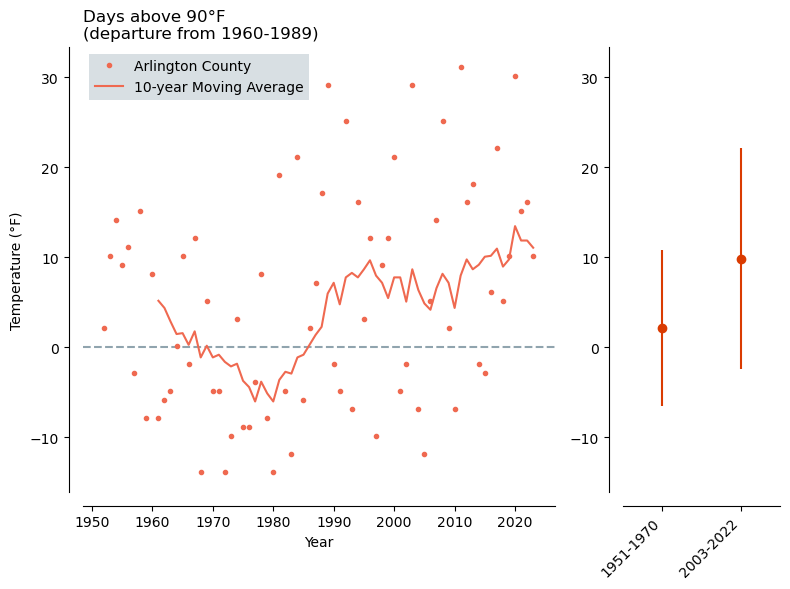

In [13]:
# Create 2-panel plot

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), tight_layout=True, sharey=True, width_ratios=(3, 1))

ax[0].axhline(y=0, color=basecolor, linestyle='--', linewidth=1.5)
above90_anom.plot(color='#EF6950', ax=ax[0], kind='line', linestyle='none', marker='o', markersize=3)
above90_anom_ma.plot(color=markercolor, ax=ax[0], linewidth=1.5, label='10-year Moving Average')

# Set the location legend
ax[0].legend(frameon=True, loc='upper left', facecolor='#CFD8DC', fancybox=False, edgecolor='none')

# ax.plot(df_hot.index, out)
drop_spines(ax[0])
ax[0].set_ylabel('Temperature (\u00b0F)')
ax[0].set_xlabel('Year')
ax[0].set_title('Days above 90\u00b0F \n(departure from 1960-1989)', loc='left')

p1 = above90_anom.loc['1951':'1970']
p2 = above90_anom.loc['2003':'2022']
# ax[1].bar([1, 2], [p1.mean(), p2.mean()], facecolor='#DA3B01')
ax[1].errorbar([1, 2], [p1.mean(), p2.mean()], yerr = [p1.std(), p2.std()], color='#DA3B01', marker='o', linestyle='none')
drop_spines(ax[1])
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['1951-1970', '2003-2022'], rotation=45, ha='right')
ax[1].set_xlim(0.5, 2.5)
# ax[1].set_yticklabels([])

In [14]:
# Compute days above 90degF 

above85 = df >= 85.0
above85 = above85.resample('Y').sum()

above85_anom = above85 - above85.loc[base[0]:base[1]].mean()
above85_anom_ma = above85_anom.rolling(roll).mean()

(0.5, 2.5)

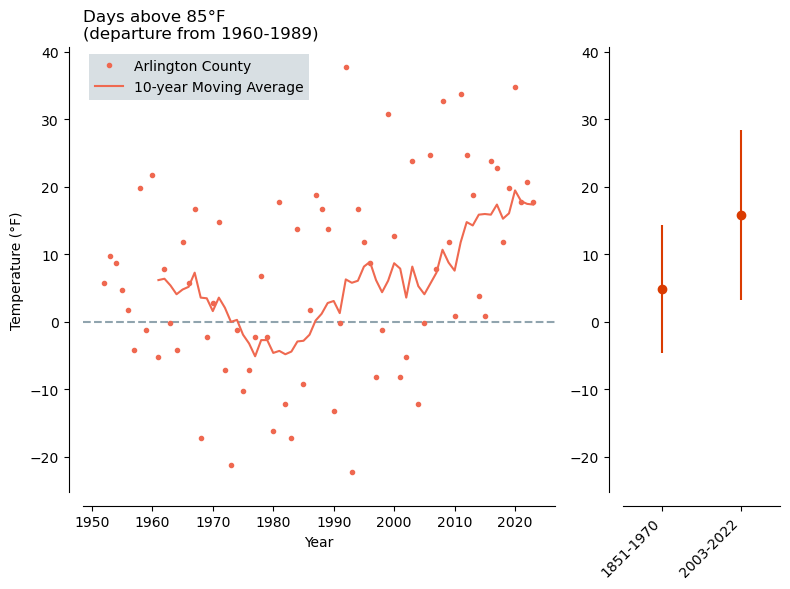

In [15]:
# Create 2-panel plot

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), tight_layout=True, sharey=True, width_ratios=(3, 1))

ax[0].axhline(y=0, color=basecolor, linestyle='--', linewidth=1.5)
above85_anom.plot(color='#EF6850', ax=ax[0], kind='line', linestyle='none', marker='o', markersize=3)
above85_anom_ma.plot(color=markercolor, ax=ax[0], linewidth=1.5, label='10-year Moving Average')

# Set the location legend
ax[0].legend(frameon=True, loc='upper left', facecolor='#CFD8DC', fancybox=False, edgecolor='none')

# ax.plot(df_hot.index, out)
drop_spines(ax[0])
ax[0].set_ylabel('Temperature (\u00b0F)')
ax[0].set_xlabel('Year')
ax[0].set_title('Days above 85\u00b0F \n(departure from 1960-1989)', loc='left')

p1 = above85_anom.loc['1851':'1970']
p2 = above85_anom.loc['2003':'2022']
# ax[1].bar([1, 2], [p1.mean(), p2.mean()], facecolor='#DA3B01')
ax[1].errorbar([1, 2], [p1.mean(), p2.mean()], yerr = [p1.std(), p2.std()], color='#DA3B01', marker='o', linestyle='none')
drop_spines(ax[1])
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['1851-1970', '2003-2022'], rotation=45, ha='right')
ax[1].set_xlim(0.5, 2.5)
# ax[1].set_yticklabels([])

# Precipitaton based indicators

In [16]:
prcp = pd.read_csv('../src_data/climdata/prcp_VA.csv', parse_dates=['date'])

# Clean up the column names
newcols = {col: col[4:] for col in prcp.columns[1:]}
prcp = prcp.rename(columns=newcols)

# Set date column as a datetime index

prcp = prcp.dropna()
prcp['date'] = pd.to_datetime(prcp['date'])
prcp = prcp.set_index('date')

In [17]:
# Plot params
basecolor = '#90A4AE'
macolor = '#0063B1'
markercolor = '#489de0'

In [18]:
# Choose location then convert to degF
# Example subset
base = ['1960', '1989']
roll = 10

df = prcp[test]/25.4  #convert to degF

In [19]:
# Compute the annual qth quantile tmax, then get anomaly and rolling mean
df_med = df.resample('Y').sum()

# Anomaly
anom = df_med - df_med.loc[base[0]:base[1]].mean()

# Rolling avg
df_med_ma = anom.rolling(roll).mean()

(0.5, 2.5)

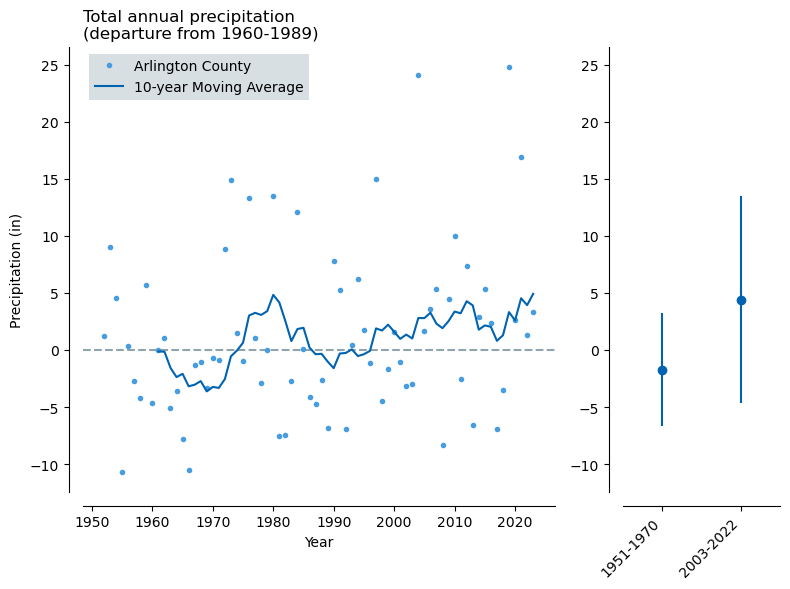

In [20]:
# Create 2-panel plot

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), tight_layout=True, sharey=True, width_ratios=(3, 1))

ax[0].axhline(y=0, color=basecolor, linestyle='--', linewidth=1.5)
anom.plot(color=markercolor, ax=ax[0], kind='line', linestyle='none', marker='o', markersize=3)
df_med_ma.plot(color=macolor, ax=ax[0], linewidth=1.5, label='10-year Moving Average')

# Set the location legend
ax[0].legend(frameon=True, loc='upper left', facecolor='#CFD8DC', fancybox=False, edgecolor='none')

# ax.plot(df_hot.index, out)
drop_spines(ax[0])
ax[0].set_ylabel('Precipitation (in)')
ax[0].set_xlabel('Year')
ax[0].set_title('Total annual precipitation\n(departure from 1960-1989)', loc='left')

p1 = anom.loc['1951':'1970']
p2 = anom.loc['2003':'2022']
# ax[1].bar([1, 2], [p1.mean(), p2.mean()], facecolor='#DA3B01')
ax[1].errorbar([1, 2], [p1.mean(), p2.mean()], yerr = [p1.std(), p2.std()], color=macolor, marker='o', linestyle='none')
drop_spines(ax[1])
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['1951-1970', '2003-2022'], rotation=45, ha='right')
ax[1].set_xlim(0.5, 2.5)
# ax[1].set_yticklabels([])

In [21]:
# Compute days above 1inch precip 

above1in = df >= 1.0
above1in = above1in.resample('Y').sum()

above1in_anom = above1in - above1in.loc[base[0]:base[1]].mean()
above1in_anom_ma = above1in_anom.rolling(roll).mean()

(0.5, 2.5)

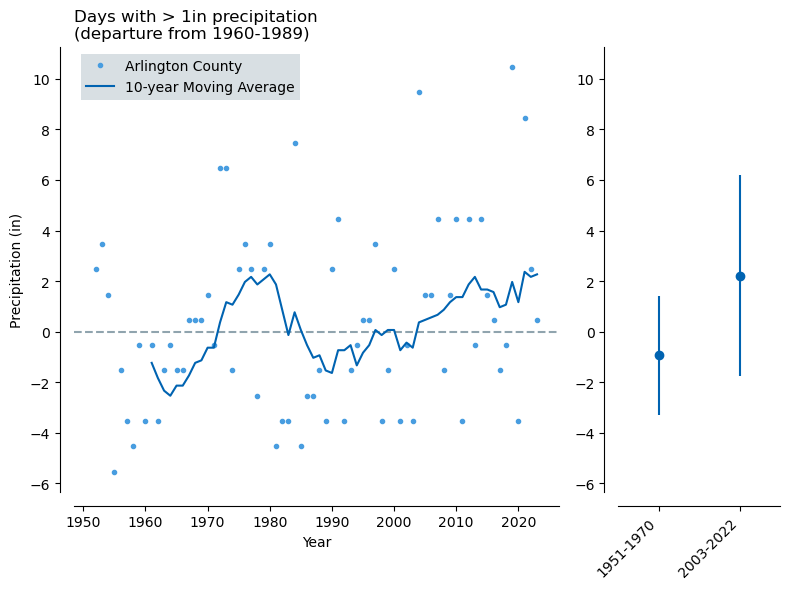

In [22]:
# Create 2-panel plot

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), tight_layout=True, sharey=True, width_ratios=(3, 1))

ax[0].axhline(y=0, color=basecolor, linestyle='--', linewidth=1.5)
above1in_anom.plot(color=markercolor, ax=ax[0], kind='line', linestyle='none', marker='o', markersize=3)
above1in_anom_ma.plot(color=macolor, ax=ax[0], linewidth=1.5, label='10-year Moving Average')

# Set the location legend
ax[0].legend(frameon=True, loc='upper left', facecolor='#CFD8DC', fancybox=False, edgecolor='none')

# ax.plot(df_hot.index, out)
drop_spines(ax[0])
ax[0].set_ylabel('Precipitation (in)')
ax[0].set_xlabel('Year')
ax[0].set_title('Days with > 1in precipitation\n(departure from 1960-1989)', loc='left')

p1 = above1in_anom.loc['1951':'1970']
p2 = above1in_anom.loc['2003':'2022']
# ax[1].bar([1, 2], [p1.mean(), p2.mean()], facecolor='#DA3B01')
ax[1].errorbar([1, 2], [p1.mean(), p2.mean()], yerr = [p1.std(), p2.std()], color=macolor, marker='o', linestyle='none')
drop_spines(ax[1])
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['1951-1970', '2003-2022'], rotation=45, ha='right')
ax[1].set_xlim(0.5, 2.5)
# ax[1].set_yticklabels([])

In [23]:
# Compute days above 1inch precip 

above2in = df >= 2.0
above2in = above2in.resample('Y').sum()

above2in_anom = above2in - above2in.loc[base[0]:base[1]].mean()
above2in_anom_ma = above2in_anom.rolling(roll).mean()

(0.5, 2.5)

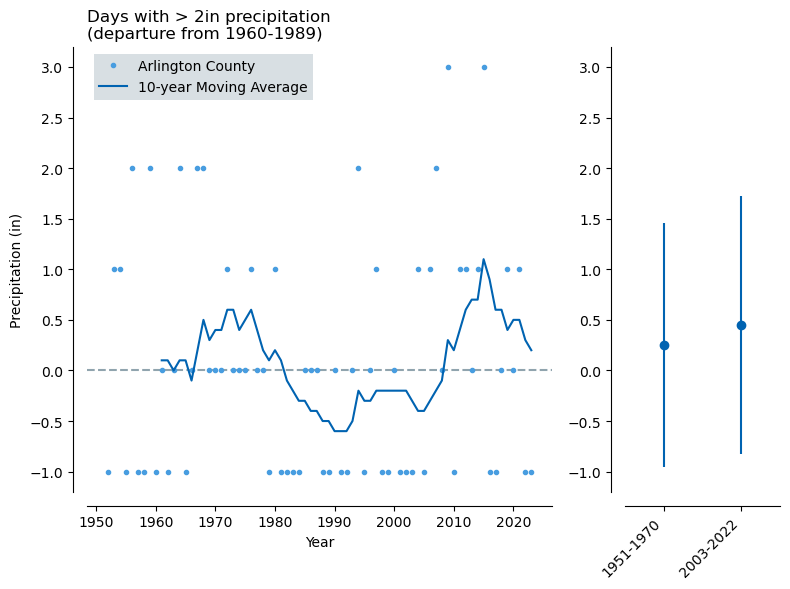

In [24]:
# Create 2-panel plot

fig, ax = plt.subplots(ncols=2, figsize=(8, 6), tight_layout=True, sharey=True, width_ratios=(3, 1))

ax[0].axhline(y=0, color=basecolor, linestyle='--', linewidth=1.5)
above2in_anom.plot(color=markercolor, ax=ax[0], kind='line', linestyle='none', marker='o', markersize=3)
above2in_anom_ma.plot(color=macolor, ax=ax[0], linewidth=1.5, label='10-year Moving Average')

# Set the location legend
ax[0].legend(frameon=True, loc='upper left', facecolor='#CFD8DC', fancybox=False, edgecolor='none')

# ax.plot(df_hot.index, out)
drop_spines(ax[0])
ax[0].set_ylabel('Precipitation (in)')
ax[0].set_xlabel('Year')
ax[0].set_title('Days with > 2in precipitation\n(departure from 1960-1989)', loc='left')

p1 = above2in_anom.loc['1951':'1970']
p2 = above2in_anom.loc['2003':'2022']
# ax[1].bar([1, 2], [p1.mean(), p2.mean()], facecolor='#DA3B01')
ax[1].errorbar([1, 2], [p1.mean(), p2.mean()], yerr = [p1.std(), p2.std()], color=macolor, marker='o', linestyle='none')
drop_spines(ax[1])
ax[1].set_xticks([1, 2])
ax[1].set_xticklabels(['1951-1970', '2003-2022'], rotation=45, ha='right')
ax[1].set_xlim(0.5, 2.5)
# ax[1].set_yticklabels([])